In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

In [2]:
# setting

start = '2000'
end = '2020'
symbol = 'AAPL'

In [3]:
# load data

data = pd.read_csv(f"Data/DWJ_download/{symbol}.csv", index_col = 0)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087117,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089273,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091861,73449600


In [4]:
data.index

Index(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17', '1980-12-18',
       '1980-12-19', '1980-12-22', '1980-12-23', '1980-12-24', '1980-12-26',
       ...
       '2024-02-06', '2024-02-07', '2024-02-08', '2024-02-09', '2024-02-12',
       '2024-02-13', '2024-02-14', '2024-02-15', '2024-02-16', '2024-02-20'],
      dtype='object', name='Date', length=10887)

In [5]:
# set index data type from object to datetime

data.set_index(pd.to_datetime(data.index), inplace = True)
data = data[start:end]
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-24,131.320007,133.460007,131.100006,131.970001,129.514481,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,134.146667,124486200
2020-12-29,138.050003,138.789993,134.339996,134.869995,132.360504,121047300
2020-12-30,135.580002,135.990005,133.399994,133.720001,131.231903,96452100
2020-12-31,134.080002,134.740005,131.720001,132.690002,130.221085,99116600


In [7]:
# rescale data from daily to monthly

data = data.resample('M').last() # last is the last date of each month
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-31,0.901786,0.927455,0.843750,0.926339,0.784238,701680000
2000-02-29,1.013951,1.046875,1.005022,1.023438,0.866442,368961600
2000-03-31,1.137835,1.225446,1.125000,1.212612,1.026597,404633600
2000-04-30,1.135045,1.138393,1.083147,1.107701,0.937779,249580800
2000-05-31,0.775670,0.814732,0.748326,0.750000,0.634950,433507200
...,...,...,...,...,...,...
2020-08-31,127.580002,131.000000,126.000000,129.039993,126.420853,225702700
2020-09-30,113.790001,117.260002,113.620003,115.809998,113.459404,142675200
2020-10-31,111.059998,111.989998,107.720001,108.860001,106.650459,190272600


In [8]:
# study only 1 column first

df = data['Adj Close']
df.head()

Date
2000-01-31    0.784238
2000-02-29    0.866442
2000-03-31    1.026597
2000-04-30    0.937779
2000-05-31    0.634950
Freq: M, Name: Adj Close, dtype: float64

In [11]:
df_train = data['Adj Close'][:'2017']
df_train.head()

Date
2000-01-31    0.784238
2000-02-29    0.866442
2000-03-31    1.026597
2000-04-30    0.937779
2000-05-31    0.634950
Freq: M, Name: Adj Close, dtype: float64

In [12]:
df_train.tail()

Date
2017-08-31    38.582081
2017-09-30    36.257744
2017-10-31    39.767773
2017-11-30    40.574184
2017-12-31    39.955593
Freq: M, Name: Adj Close, dtype: float64

In [14]:
df_test = data['Adj Close']['2018':]
df_test.head()

Date
2018-01-31    39.530609
2018-02-28    42.225998
2018-03-31    39.774757
2018-04-30    39.177341
2018-05-31    44.471138
Freq: M, Name: Adj Close, dtype: float64

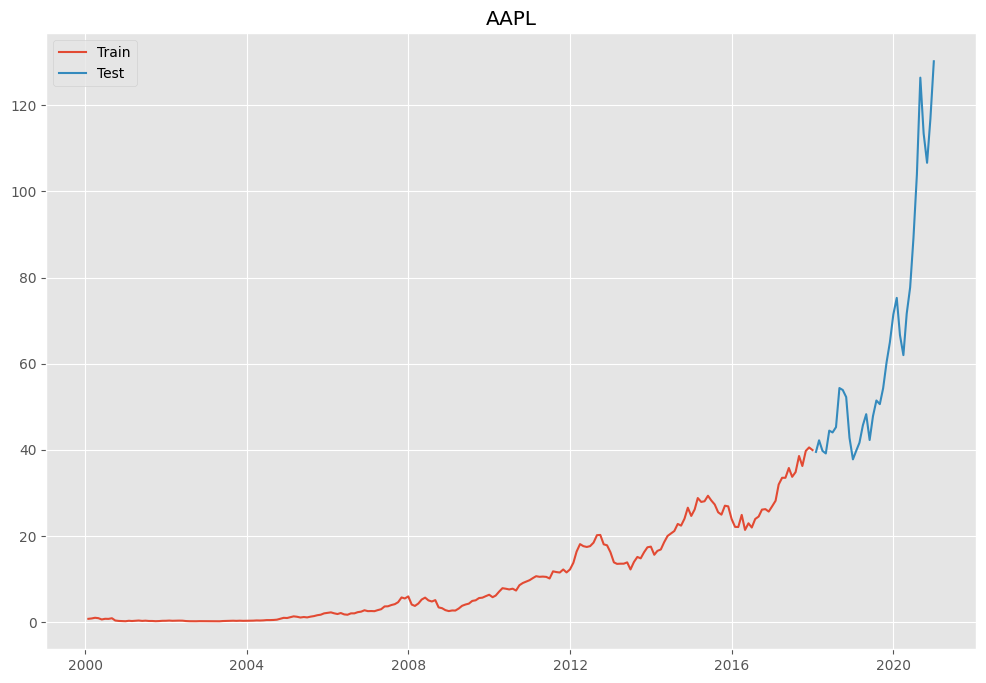

In [15]:
# plot

plt.rcParams['figure.figsize'] = (12.0, 8.0)

plt.plot(df_train, label = 'Train')
plt.plot(df_test, label = 'Test')

plt.legend()
plt.title(f'{symbol}');

### Simple Exponential Smoothing

https://towardsdatascience.com/simple-exponential-smoothing-749fc5631bed


### $\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t\end{split}$

In [16]:
# load a library

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [17]:
ses02 = SimpleExpSmoothing(df_train, initialization_method = 'estimated').fit(0.2)
ses09 = SimpleExpSmoothing(df_train, initialization_method = 'estimated').fit(0.9)

In [18]:
ses02, ses09

(<statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x153c112e0>,
 <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x154852ee0>)

In [19]:
ses02.fittedvalues

Date
2000-01-31     0.757644
2000-02-29     0.762963
2000-03-31     0.783659
2000-04-30     0.832246
2000-05-31     0.853353
                ...    
2017-08-31    32.001107
2017-09-30    33.317302
2017-10-31    33.905390
2017-11-30    35.077867
2017-12-31    36.177130
Freq: M, Length: 216, dtype: float64

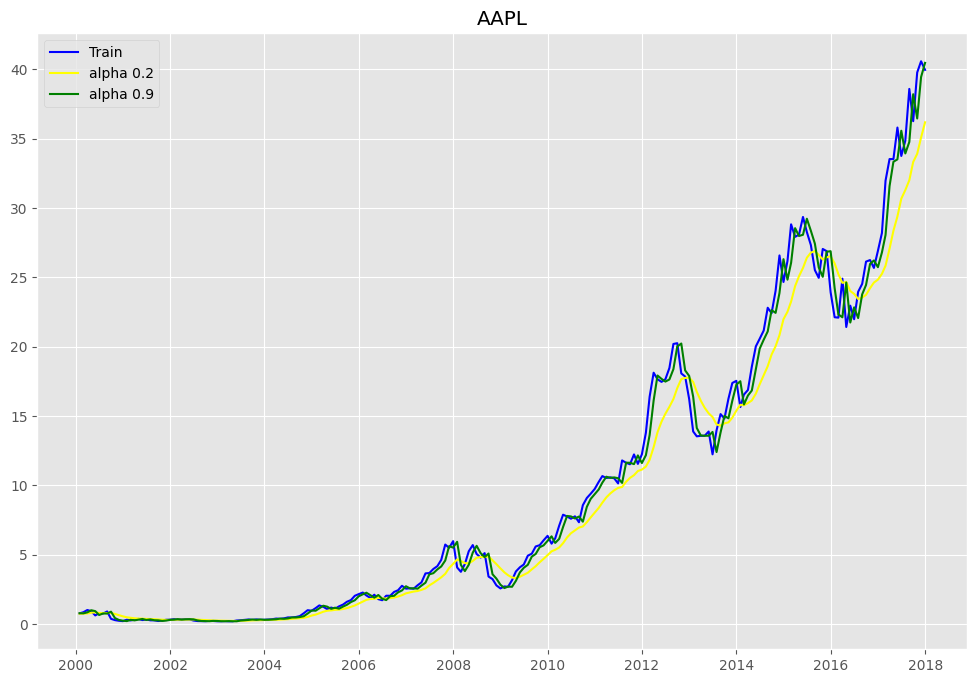

In [21]:
# plot to compare

plt.rcParams['figure.figsize'] = (12.0, 8.0)

plt.plot(df_train, label = "Train", color = 'blue')
plt.plot(ses02.fittedvalues, label = "alpha 0.2", color = 'yellow')
plt.plot(ses09.fittedvalues, label = "alpha 0.9", color = 'green')

plt.title(f"{symbol}")
plt.legend()
plt.show()

### Do a prediction

In [22]:
df_test.shape

(36,)

In [23]:
pred02 = ses02.forecast(df_test.shape[0]) # forcast per the df_test's length
pred09 = ses09.forecast(df_test.shape[0])
pred02, pred09

(2018-01-31    36.932823
 2018-02-28    36.932823
 2018-03-31    36.932823
 2018-04-30    36.932823
 2018-05-31    36.932823
 2018-06-30    36.932823
 2018-07-31    36.932823
 2018-08-31    36.932823
 2018-09-30    36.932823
 2018-10-31    36.932823
 2018-11-30    36.932823
 2018-12-31    36.932823
 2019-01-31    36.932823
 2019-02-28    36.932823
 2019-03-31    36.932823
 2019-04-30    36.932823
 2019-05-31    36.932823
 2019-06-30    36.932823
 2019-07-31    36.932823
 2019-08-31    36.932823
 2019-09-30    36.932823
 2019-10-31    36.932823
 2019-11-30    36.932823
 2019-12-31    36.932823
 2020-01-31    36.932823
 2020-02-29    36.932823
 2020-03-31    36.932823
 2020-04-30    36.932823
 2020-05-31    36.932823
 2020-06-30    36.932823
 2020-07-31    36.932823
 2020-08-31    36.932823
 2020-09-30    36.932823
 2020-10-31    36.932823
 2020-11-30    36.932823
 2020-12-31    36.932823
 Freq: M, dtype: float64,
 2018-01-31    40.006072
 2018-02-28    40.006072
 2018-03-31    40.006072

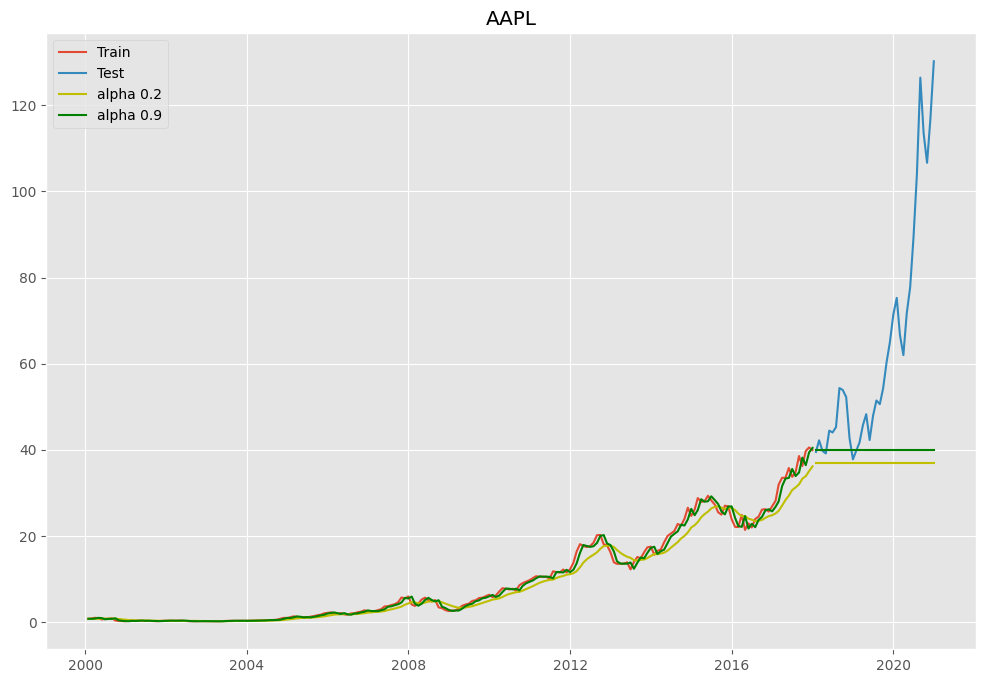

In [24]:
# plot 

plt.rcParams['figure.figsize'] = (12.0, 8.0)

plt.plot(df_train, label = "Train")
plt.plot(df_test, label = "Test")

plt.plot(ses02.fittedvalues, color = "y", label = "alpha 0.2")
plt.plot(ses09.fittedvalues, color = "g", label = "alpha 0.9")
plt.plot(pred02, color = "y")
plt.plot(pred09, color = "g")

plt.title(f"{symbol}")
plt.legend()
plt.show()